1. Importation des bibliothèques nécessaires

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import seaborn as sns


2. Chargement des données

In [ ]:
data = pd.read_csv("MC.PA.csv")  # Chargement des données dans un DataFrame


In [ ]:
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2022-12-06  713.000000  715.299988  708.400024  714.200012  703.083069   
1  2022-12-07  707.599976  717.500000  707.200012  712.799988  701.704834   
2  2022-12-08  713.200012  721.700012  711.599976  719.000000  707.808289   
3  2022-12-09  721.900024  726.799988  715.400024  720.299988  709.088074   
4  2022-12-12  714.599976  719.299988  711.400024  716.200012  705.051880   

     Volume  
0  347705.0  
1  336309.0  
2  279248.0  
3  310103.0  
4  318952.0  


3. Vérification et gestion des valeurs manquantes


In [ ]:
# Vérifier les valeurs manquantes
missing_values = data.isnull().sum()
print(missing_values)

# Supprimer les lignes avec des valeurs manquantes
cleaned_data = data.dropna()
print(cleaned_data.isnull().sum())

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


4. Détection des valeurs aberrantes avec KNN

<ipython-input-23-a169f4855e8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlier'] = predictions
<ipython-input-23-a169f4855e8e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


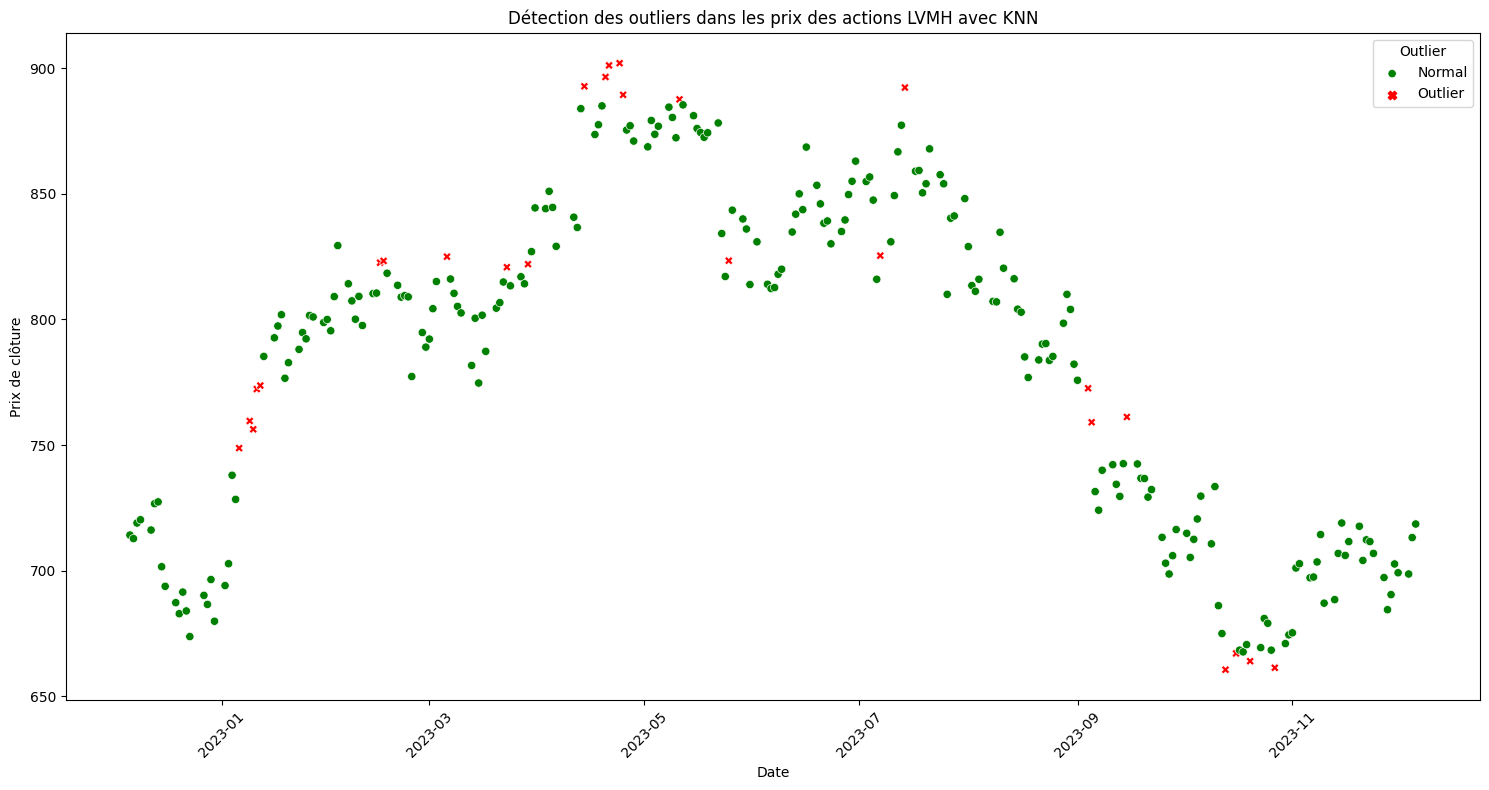

In [ ]:
def detect_outliers_with_knn(data, n_neighbors=20):
    # Utilisation de l'algorithme Local Outlier Factor pour la détection des outliers
    clf = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=0.1)

    # Utilisation du prix de clôture ('Close') pour la détection des outliers
    X = data[['Close']]
    predictions = clf.fit_predict(X)
    data['Outlier'] = predictions

    # Création d'un graphique pour visualiser les résultats
    plt.figure(figsize=(15, 8))
    data['Date'] = pd.to_datetime(data['Date'])
    sns.scatterplot(data=data, x='Date', y='Close', hue='Outlier', palette={-1: 'r', 1: 'g'}, style='Outlier', markers={1: 'o', -1: 'X'})
    plt.title('Détection des outliers dans les prix des actions LVMH avec KNN')
    plt.xlabel('Date')
    plt.ylabel('Prix de clôture')
    plt.legend(title='Outlier', loc='upper right', labels=['Normal', 'Outlier'])
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Filtrer pour ne retourner que les données aberrantes
    outliers = data[data['Outlier'] == -1]
    return outliers


# Application de la fonction aux données nettoyées
outlier_detected_data_cleaned = detect_outliers_with_knn(cleaned_data)


5. Affichage des données avec les informations sur les outliers

In [ ]:
outlier_detected_data_cleaned.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Outlier
22,2023-01-06,734.000000,748.799988,728.799988,748.799988,737.144409,318415.0,-1
23,2023-01-09,748.000000,761.599976,746.099976,759.599976,747.776306,486846.0,-1
24,2023-01-10,748.700012,758.400024,747.200012,756.299988,744.527710,327475.0,-1
25,2023-01-11,764.599976,775.299988,759.500000,772.299988,760.278625,450736.0,-1
26,2023-01-12,769.200012,787.900024,768.900024,773.700012,761.656860,462249.0,-1


In [ ]:
def detect_and_plot_outliers(data, feature, n_neighbors=20, contamination=0.1):
    # Utilisation de l'algorithme Local Outlier Factor pour la détection des outliers
    clf = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)

    # Utilisation d'une caractéristique spécifique pour la détection des outliers
    X = data[[feature]]
    predictions = clf.fit_predict(X)
    data['Outlier'] = predictions

    # Création d'un graphique pour visualiser les résultats pour la caractéristique spécifiée
    plt.figure(figsize=(15, 8))
    data['Date'] = pd.to_datetime(data['Date'])
    sns.scatterplot(data=data, x='Date', y=feature, hue='Outlier', palette={-1: 'r', 1: 'g'}, style='Outlier', markers={1: 'o', -1: 'X'})
    plt.title(f'Outlier Detection in {feature} Using KNN')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend(title='Outlier', loc='upper right', labels=['Normal', 'Outlier'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Filtrer pour ne retourner que les données aberrantes
    outliers = data[data['Outlier'] == -1]
    return outliers


Analyzing Open


<ipython-input-25-632fb39d3eae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlier'] = predictions
<ipython-input-25-632fb39d3eae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


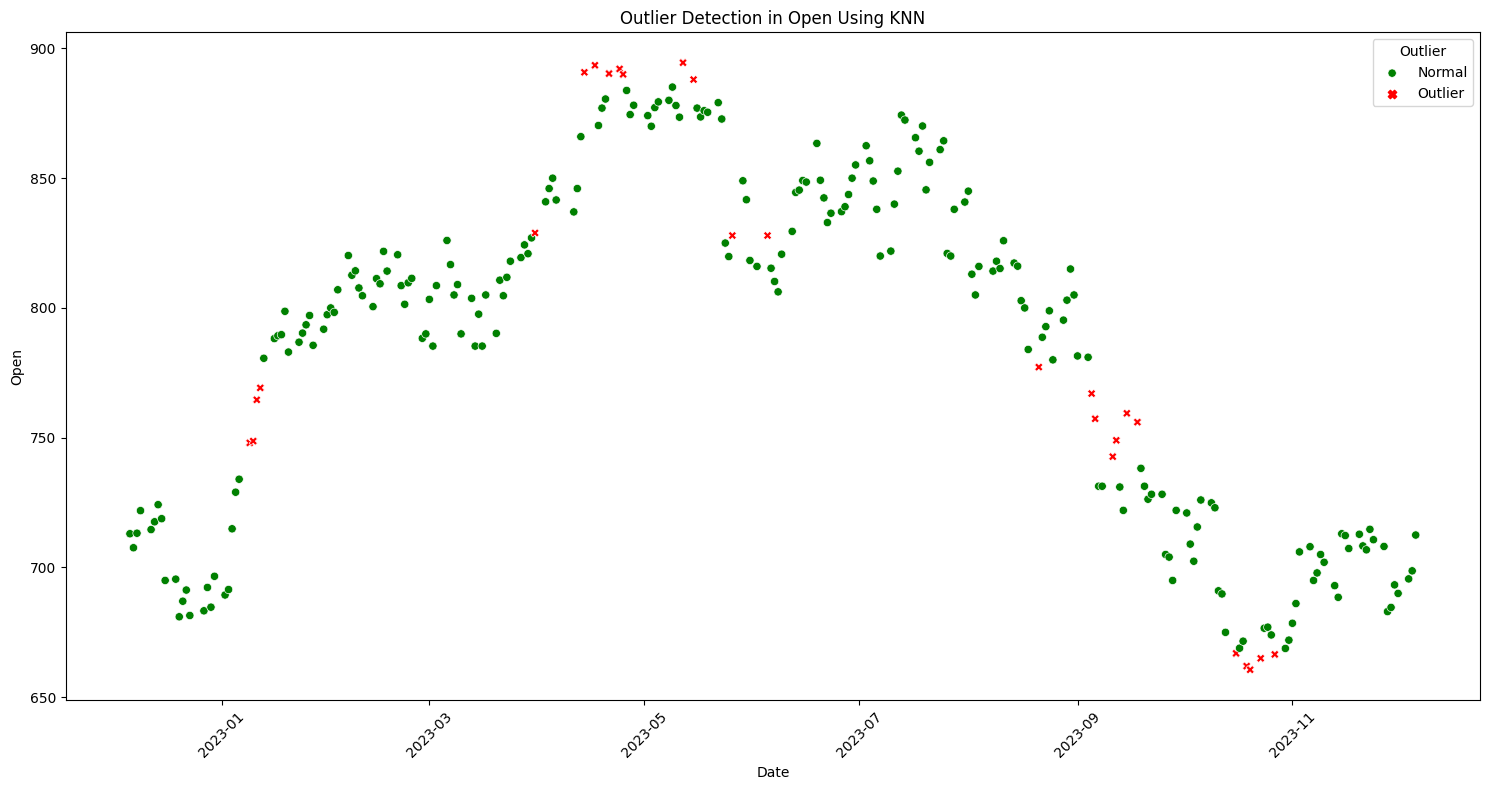

,Date,Open,High,Low,Close,Adj Close,Volume,Outlier
23,2023-01-09,748.000000,761.599976,746.099976,759.599976,747.776306,486846.0,-1
24,2023-01-10,748.700012,758.400024,747.200012,756.299988,744.527710,327475.0,-1
25,2023-01-11,764.599976,775.299988,759.500000,772.299988,760.278625,450736.0,-1
26,2023-01-12,769.200012,787.900024,768.900024,773.700012,761.656860,462249.0,-1
82,2023-03-31,828.900024,848.200012,828.200012,844.400024,831.256409,482929.0,-1


Analyzing High


<ipython-input-25-632fb39d3eae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlier'] = predictions
<ipython-input-25-632fb39d3eae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


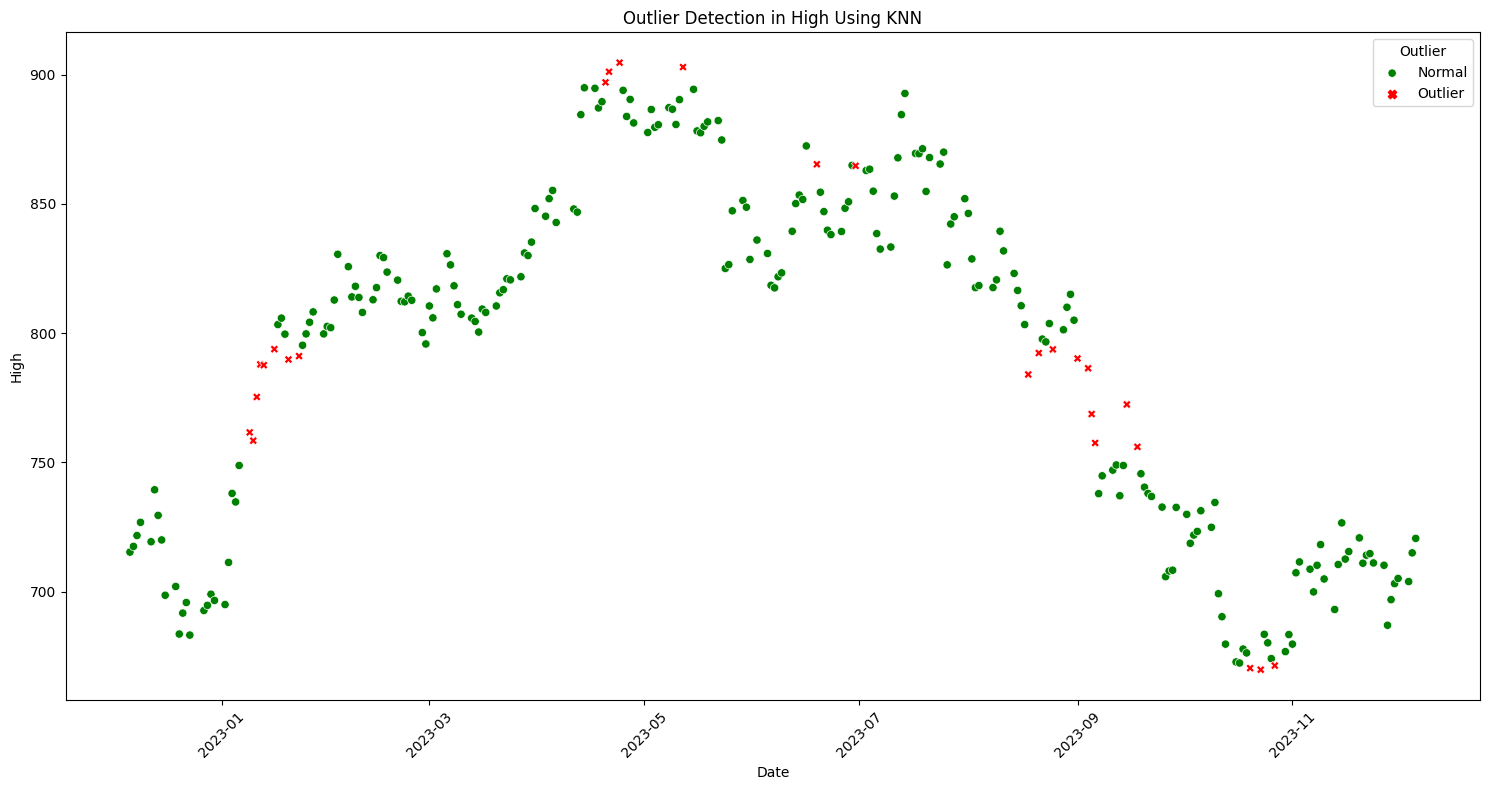

,Date,Open,High,Low,Close,Adj Close,Volume,Outlier
23,2023-01-09,748.000000,761.599976,746.099976,759.599976,747.776306,486846.0,-1
24,2023-01-10,748.700012,758.400024,747.200012,756.299988,744.527710,327475.0,-1
25,2023-01-11,764.599976,775.299988,759.500000,772.299988,760.278625,450736.0,-1
26,2023-01-12,769.200012,787.900024,768.900024,773.700012,761.656860,462249.0,-1
27,2023-01-13,780.599976,787.599976,772.799988,785.299988,773.076294,375528.0,-1


Analyzing Low


<ipython-input-25-632fb39d3eae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlier'] = predictions
<ipython-input-25-632fb39d3eae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


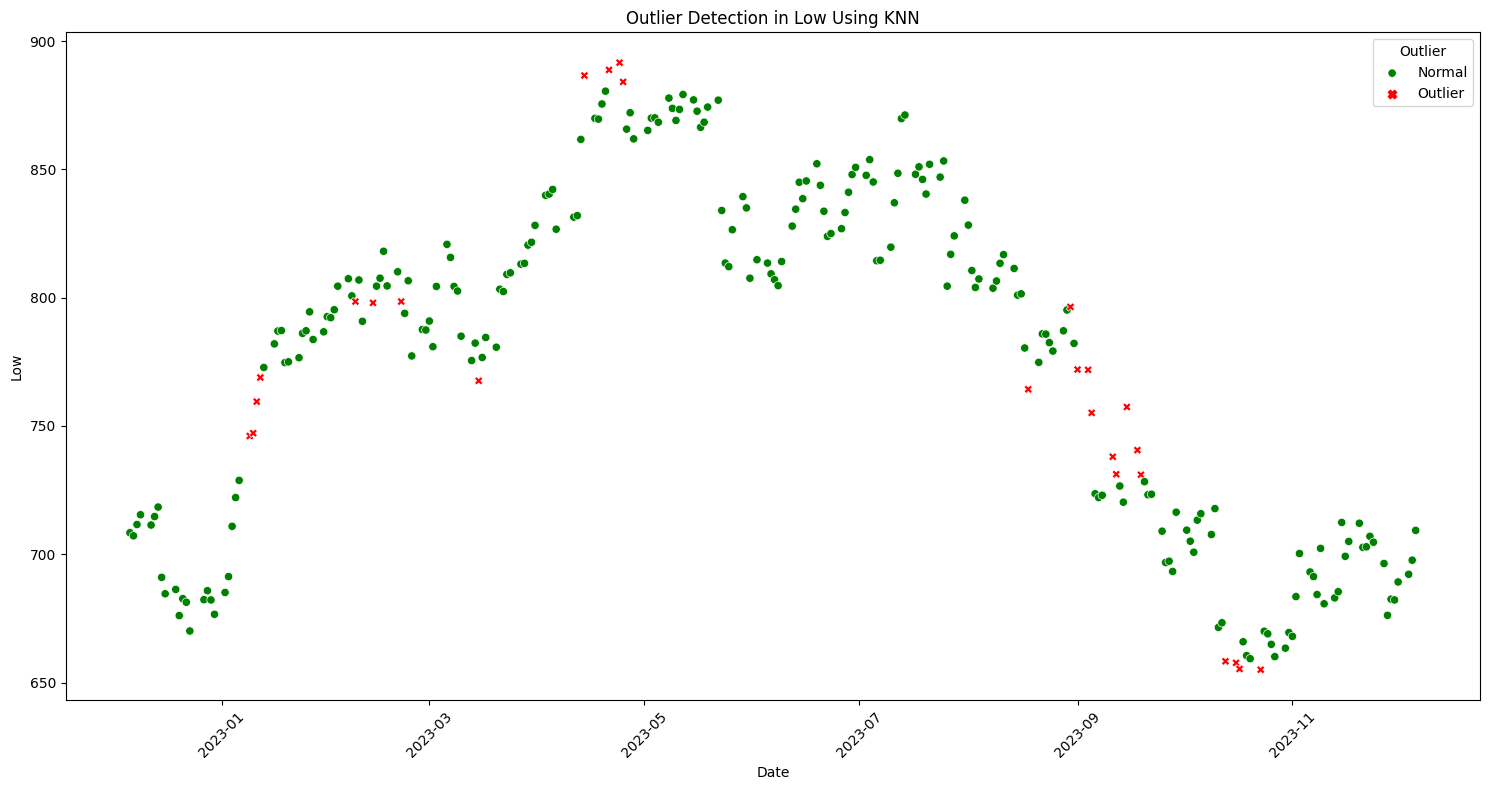

,Date,Open,High,Low,Close,Adj Close,Volume,Outlier
23,2023-01-09,748.000000,761.599976,746.099976,759.599976,747.776306,486846.0,-1
24,2023-01-10,748.700012,758.400024,747.200012,756.299988,744.527710,327475.0,-1
25,2023-01-11,764.599976,775.299988,759.500000,772.299988,760.278625,450736.0,-1
26,2023-01-12,769.200012,787.900024,768.900024,773.700012,761.656860,462249.0,-1
45,2023-02-08,814.299988,818.099976,798.500000,800.099976,787.645935,319321.0,-1


Analyzing Close


<ipython-input-25-632fb39d3eae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlier'] = predictions
<ipython-input-25-632fb39d3eae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


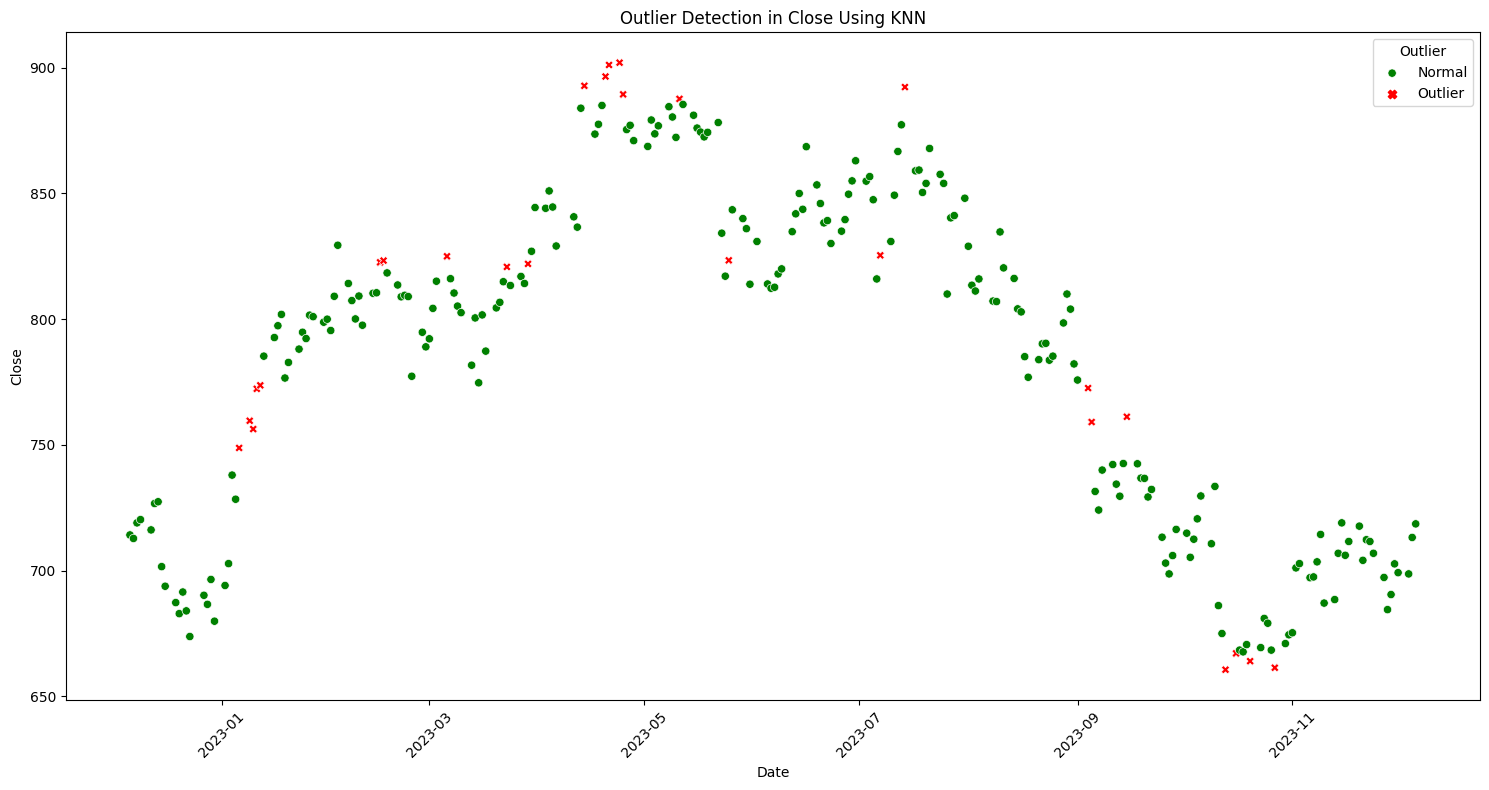

,Date,Open,High,Low,Close,Adj Close,Volume,Outlier
22,2023-01-06,734.000000,748.799988,728.799988,748.799988,737.144409,318415.0,-1
23,2023-01-09,748.000000,761.599976,746.099976,759.599976,747.776306,486846.0,-1
24,2023-01-10,748.700012,758.400024,747.200012,756.299988,744.527710,327475.0,-1
25,2023-01-11,764.599976,775.299988,759.500000,772.299988,760.278625,450736.0,-1
26,2023-01-12,769.200012,787.900024,768.900024,773.700012,761.656860,462249.0,-1


Analyzing Adj Close


<ipython-input-25-632fb39d3eae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlier'] = predictions
<ipython-input-25-632fb39d3eae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


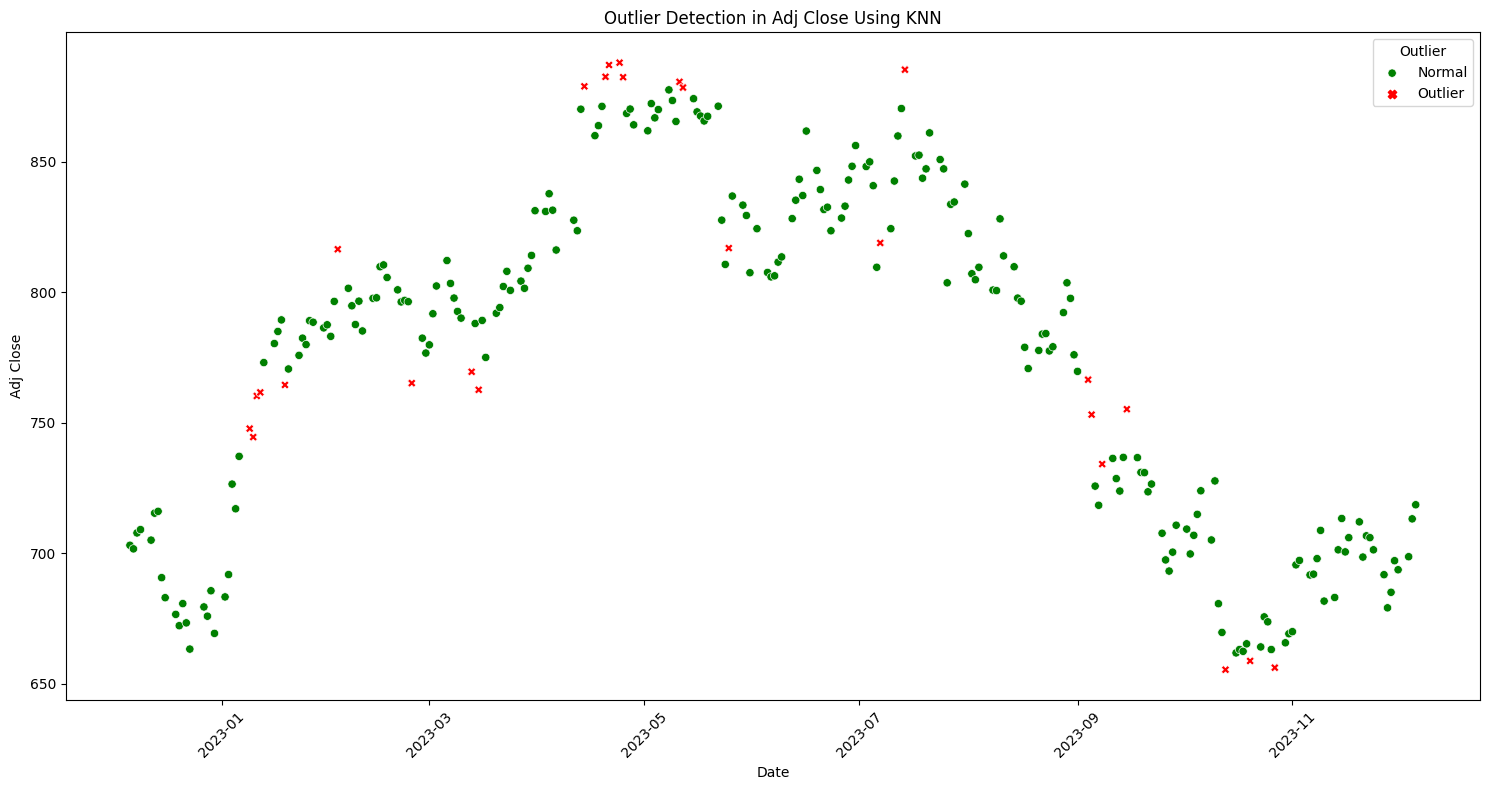

,Date,Open,High,Low,Close,Adj Close,Volume,Outlier
23,2023-01-09,748.000000,761.599976,746.099976,759.599976,747.776306,486846.0,-1
24,2023-01-10,748.700012,758.400024,747.200012,756.299988,744.527710,327475.0,-1
25,2023-01-11,764.599976,775.299988,759.500000,772.299988,760.278625,450736.0,-1
26,2023-01-12,769.200012,787.900024,768.900024,773.700012,761.656860,462249.0,-1
31,2023-01-19,798.700012,799.599976,774.700012,776.599976,764.511719,493048.0,-1


Analyzing Volume


<ipython-input-25-632fb39d3eae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlier'] = predictions
<ipython-input-25-632fb39d3eae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


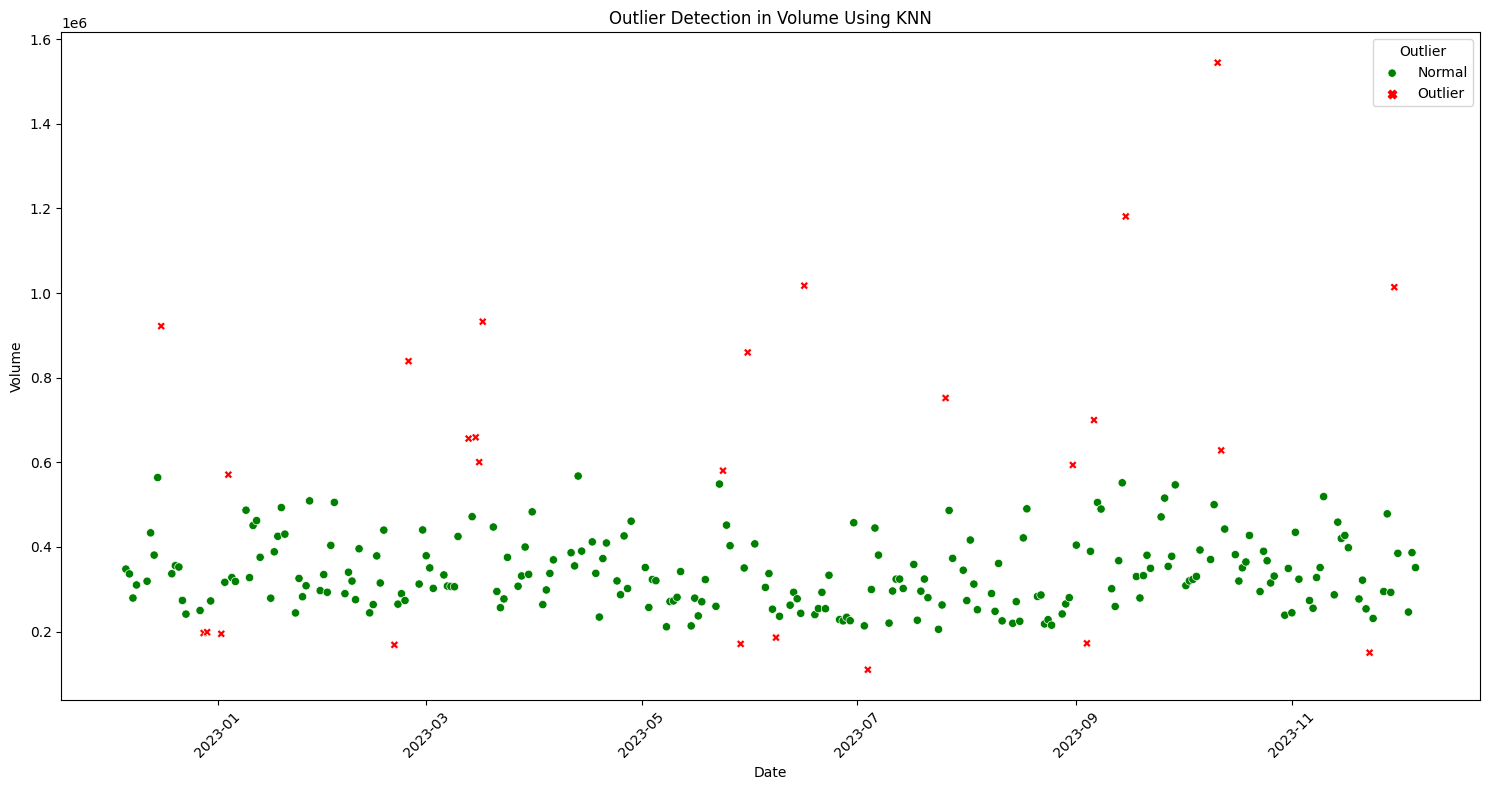

,Date,Open,High,Low,Close,Adj Close,Volume,Outlier
8,2022-12-16,695.000000,698.599976,684.599976,693.799988,683.000549,921702.0,-1
15,2022-12-28,692.299988,694.700012,685.799988,686.599976,675.912598,196630.0,-1
16,2022-12-29,684.700012,699.000000,682.200012,696.500000,685.658508,198655.0,-1
18,2023-01-02,689.400024,695.000000,685.099976,694.099976,683.295837,194703.0,-1
20,2023-01-04,714.900024,738.000000,710.900024,738.000000,726.512512,570725.0,-1


In [ ]:
features_to_analyze = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for feature in features_to_analyze:
    print(f"Analyzing {feature}")
    outliers = detect_and_plot_outliers(cleaned_data, feature)
    display(outliers.head())


Methode DBSCAN


<ipython-input-27-dd86a8b7dfae>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlier'] = clusters
<ipython-input-27-dd86a8b7dfae>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


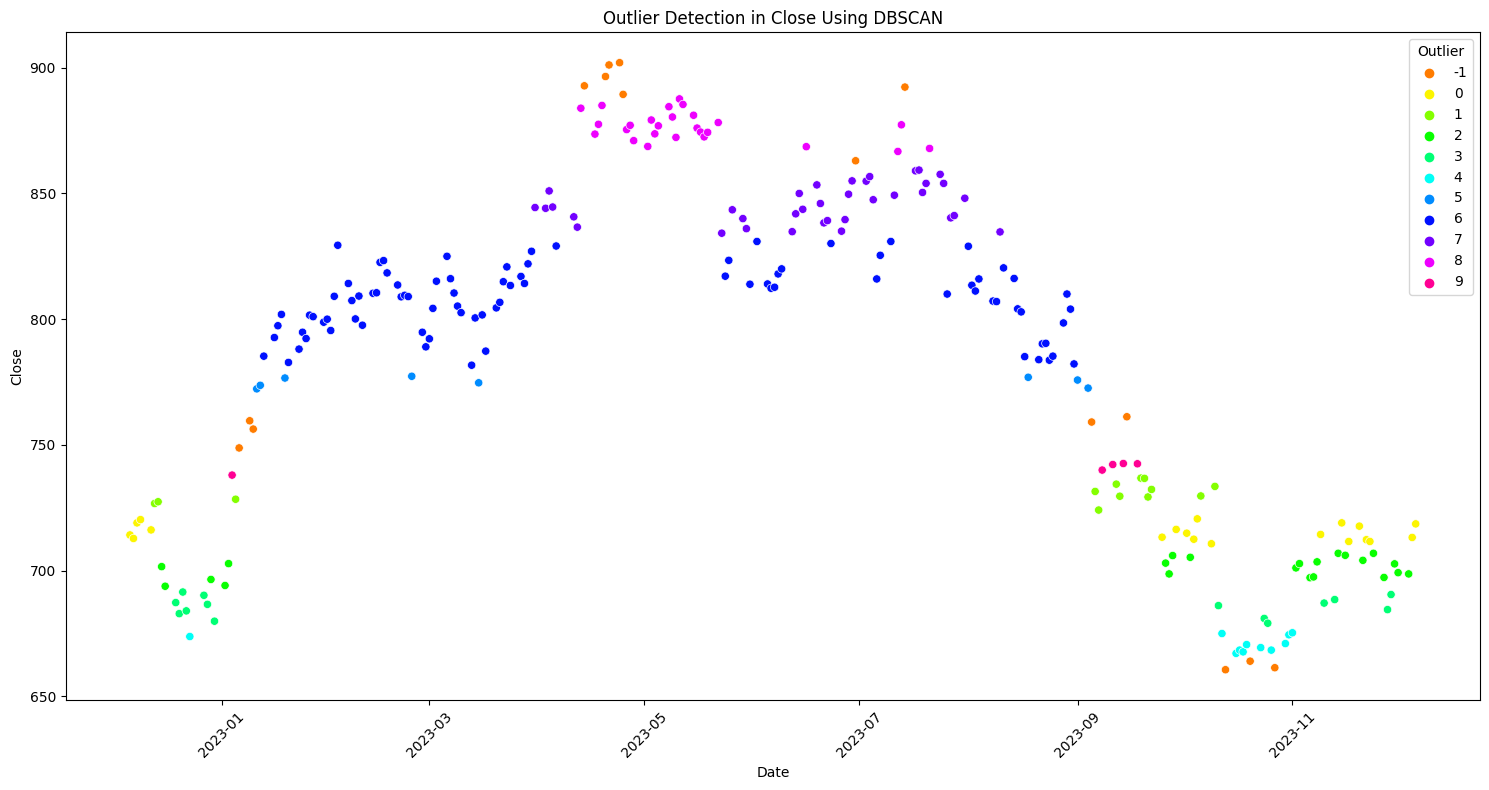

In [ ]:
def detect_outliers_with_dbscan(data, eps=0.5, min_samples=10, feature='Close'):
    """
    Detect and plot outliers using the DBSCAN method with fixed palette.

    :param data: DataFrame containing the financial data.
    :param eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    :param min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
    :param feature: The feature to use for outlier detection.
    :return: DataFrame containing the outliers.
    """
    # Reshaping the data for DBSCAN
    X = data[[feature]].values.reshape(-1, 1)

    # Applying DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)

    # Marking the outliers
    data['Outlier'] = clusters

    # Plotting
    plt.figure(figsize=(15, 8))
    data['Date'] = pd.to_datetime(data['Date'])
    unique_clusters = np.unique(clusters)
    palette = sns.color_palette("hsv", len(unique_clusters))
    sns.scatterplot(data=data, x='Date', y=feature, hue='Outlier', palette=palette, style='Outlier', markers={c: 'o' for c in unique_clusters})
    plt.title(f'Outlier Detection in {feature} Using DBSCAN')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend(title='Outlier', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Returning outliers
    outliers = data[data['Outlier'] == -1]
    return outliers

# Applying the fixed DBSCAN method with plotting
outliers_dbscan = detect_outliers_with_dbscan(cleaned_data, eps=3, min_samples=5, feature='Close')


In [ ]:
outliers_dbscan.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Outlier
22,2023-01-06,734.000000,748.799988,728.799988,748.799988,737.144409,318415.0,-1
23,2023-01-09,748.000000,761.599976,746.099976,759.599976,747.776306,486846.0,-1
24,2023-01-10,748.700012,758.400024,747.200012,756.299988,744.527710,327475.0,-1
90,2023-04-14,890.799988,894.900024,886.599976,892.799988,878.903015,390098.0,-1
94,2023-04-20,880.500000,897.000000,880.500000,896.500000,882.545410,372465.0,-1


Methode densite de noyau

<ipython-input-28-734650ddf563>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Density'] = scores
<ipython-input-28-734650ddf563>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlier'] = data['Density'] < strict_threshold
<ipython-input-28-734650ddf563>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

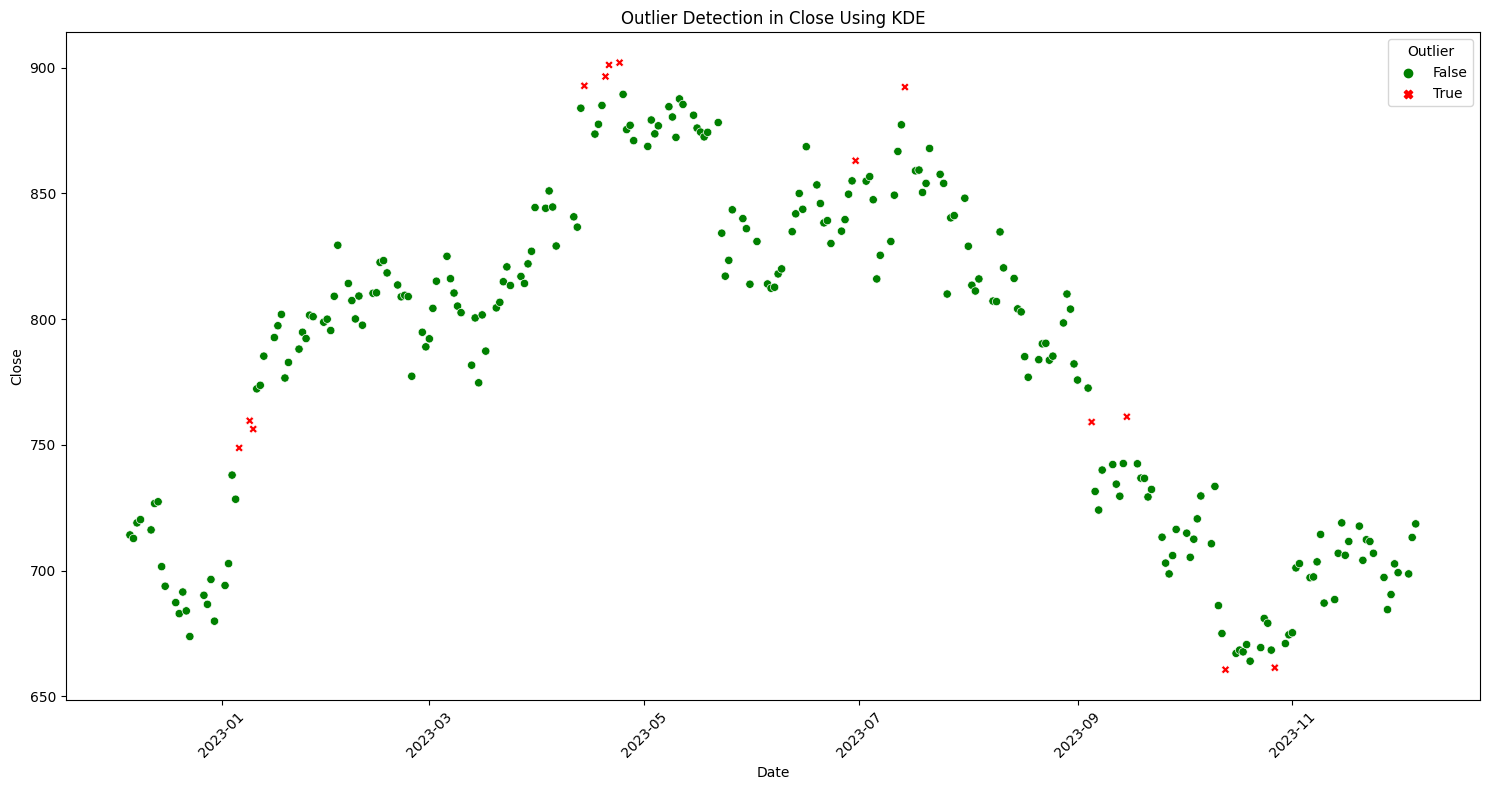

In [ ]:
def detect_outliers_with_kde(data, bandwidth=1.0, feature='Close'):
    """
    Detect outliers using Kernel Density Estimation (KDE) with a strict threshold and plot the results.

    :param data: DataFrame containing the financial data.
    :param bandwidth: The bandwidth of the kernel.
    :param feature: The feature to use for outlier detection.
    :return: DataFrame containing only the outliers.
    """
    # Reshaping the data for KDE
    X = data[[feature]].values.reshape(-1, 1)

    # Applying KDE
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(X)

    # Calculate the density scores
    scores = kde.score_samples(X)
    data['Density'] = scores

    # Determining a strict threshold based on the distribution of density scores
    strict_threshold = np.percentile(scores, 5)  # Using the 5th percentile as the threshold

    # Marking the outliers
    data['Outlier'] = data['Density'] < strict_threshold

    # Plotting
    plt.figure(figsize=(15, 8))
    data['Date'] = pd.to_datetime(data['Date'])
    sns.scatterplot(data=data, x='Date', y=feature, hue='Outlier', palette={False: 'g', True: 'r'}, style='Outlier', markers={False: 'o', True: 'X'})
    plt.title(f'Outlier Detection in {feature} Using KDE')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend(title='Outlier', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Returning outliers
    outliers = data[data['Outlier']]
    return outliers

# Applying the function with plotting for KDE method
outliers_kde = detect_outliers_with_kde(cleaned_data, bandwidth=3, feature='Close')


In [ ]:
outliers_kde.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Outlier,Density
22,2023-01-06,734.000000,748.799988,728.799988,748.799988,737.144409,318415.0,True,-7.239567
23,2023-01-09,748.000000,761.599976,746.099976,759.599976,747.776306,486846.0,True,-6.338520
24,2023-01-10,748.700012,758.400024,747.200012,756.299988,744.527710,327475.0,True,-6.646261
90,2023-04-14,890.799988,894.900024,886.599976,892.799988,878.903015,390098.0,True,-6.353834
94,2023-04-20,880.500000,897.000000,880.500000,896.500000,882.545410,372465.0,True,-6.681908


**Comparaison des méthodes**

1)Temps d'éxécution

In [ ]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor, KernelDensity
from sklearn.cluster import DBSCAN
import time
from memory_profiler import memory_usage

# Load the cleaned data from the CSV file
cleaned_data = pd.read_csv('MC.PA.csv')

# Function to measure the performance of a given function with memory and time
def measure_performance(cleaned_data, function, *args):
    # Create a lambda function to wrap the function and its arguments
    func = lambda: function(cleaned_data, *args)

    # Measure memory usage
    mem_usage = memory_usage(func, max_usage=True)

    # Measure execution time
    start_time = time.time()
    function(cleaned_data, *args)
    end_time = time.time()

    execution_time = end_time - start_time

    return execution_time, mem_usage

# Define the detect_outliers_with_knn function
def detect_outliers_with_knn(data, column):
    # Your implementation for KNN-based outlier detection
    pass

# Define the detect_outliers_with_dbscan function
def detect_outliers_with_dbscan(data, column):
    # Your implementation for DBSCAN-based outlier detection
    pass

# Define the detect_outliers_with_kde function
def detect_outliers_with_kde(data, column):
    # Your implementation for KDE-based outlier detection
    pass

# Measure the performance of each algorithm
time_knn, mem_knn = measure_performance(cleaned_data, detect_outliers_with_knn, 'Close')
time_dbscan, mem_dbscan = measure_performance(cleaned_data, detect_outliers_with_dbscan, 'Close')
time_kde, mem_kde = measure_performance(cleaned_data, detect_outliers_with_kde, 'Close')

# Print the results
print("Le temps d'exécution pour KNN est :", time_knn, "avec une utilisation de mémoire de :", mem_knn)
print("Le temps d'exécution pour DBSCAN est :", time_dbscan, "avec une utilisation de mémoire de :", mem_dbscan)
print("Le temps d'exécution pour KDE est :", time_kde, "avec une utilisation de mémoire de :", mem_kde)

Le temps d'exécution pour KNN est : 4.0531158447265625e-06 avec une utilisation de mémoire de : 263.3828125
Le temps d'exécution pour DBSCAN est : 3.5762786865234375e-06 avec une utilisation de mémoire de : 263.52734375
Le temps d'exécution pour KDE est : 4.291534423828125e-06 avec une utilisation de mémoire de : 263.52734375


2)Comparaison des performances

The number of columns in the dataset is: 5
The number of lines in the dataset is: 258


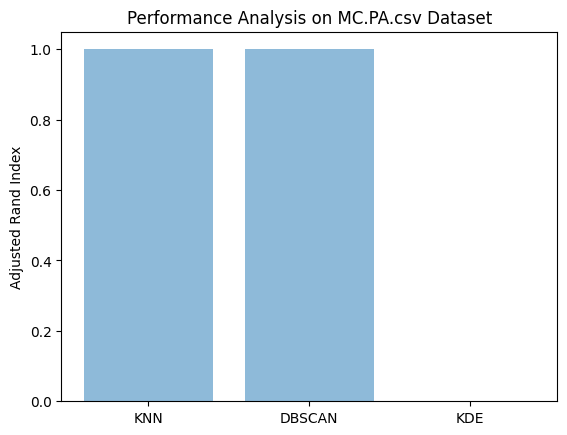

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KernelDensity
from sklearn.metrics import adjusted_rand_score

# Load the 'MC.PA.csv' dataset
dataset = pd.read_csv('MC.PA.csv')
yourData = dataset.iloc[:, 1:6].values  # Select columns 1 to 6 as your data
yourDataLabels = dataset['Close'].values  # Use 'Close' column as labels

# Define the thresholds to create classes
thresholds = [0, 1, 2]  # Define your own thresholds here

# Convert 'Close' values into discrete classes based on thresholds
yourDataLabels = np.digitize(yourDataLabels, thresholds)

# Print the number of columns and lines in the dataset
number_of_column = yourData.shape[1]
print("The number of columns in the dataset is:", number_of_column)

number_of_line = yourData.shape[0]
print("The number of lines in the dataset is:", number_of_line)

# Define the number of repetitions
num_repetitions = 150

# Initialize an array to store Rand index values
ri_your_dataset = np.zeros((3, num_repetitions))

# Step 1: Handle missing values in features
imputer = SimpleImputer(strategy='mean')
yourData_imputed = imputer.fit_transform(yourData)

# Step 2: Perform the classification and calculate Rand index for each repetition
for k in range(num_repetitions):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(yourData_imputed, yourDataLabels)
    ri_your_dataset[0, k] = adjusted_rand_score(yourDataLabels, knn.predict(yourData_imputed))

    dbscan = DBSCAN(eps=0.5, min_samples=5)
    ri_your_dataset[1, k] = adjusted_rand_score(yourDataLabels, dbscan.fit_predict(yourData_imputed))

    kde = KernelDensity(bandwidth=0.5)
    kde.fit(yourData_imputed)
    predicted_labels = kde.sample(len(yourData_imputed))
    predicted_labels = np.argmax(predicted_labels, axis=1)
    ri_your_dataset[2, k] = adjusted_rand_score(yourDataLabels, predicted_labels)

# Plot the performance analysis
x_your_dataset = [0, 1, 2]
plt.bar(x_your_dataset, np.mean(ri_your_dataset, axis=1), yerr=np.std(ri_your_dataset, axis=1), alpha=0.5,
        ecolor='black')
plt.ylabel('Adjusted Rand Index')
plt.xticks(x_your_dataset, ['KNN', 'DBSCAN', 'KDE'])
plt.title('Performance Analysis on MC.PA.csv Dataset')
plt.show()